In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
data_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
data_custom = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
tensor_celsius = torch.tensor(data_celsius)
tensor_custom = torch.tensor(data_custom)

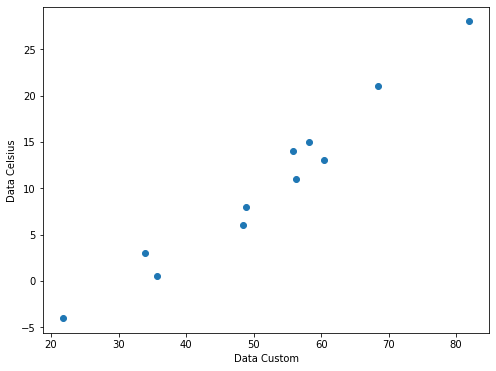

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius)

In [4]:
# defining our linear model
def model(t_u, w, b):
    t_p = w*t_u + b
    return t_p

In [5]:
# defining our loss functions
def mean_square_loss(t_p, t_c):
    return torch.square(t_p - t_c).mean()

In [6]:
t_u = tensor_custom
t_c = tensor_celsius

In [7]:
w = torch.ones(())
b = torch.zeros(())

In [8]:
w, b

(tensor(1.), tensor(0.))

In [9]:
t_p = model(t_u, w, b)

In [10]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
mean_square_loss(t_p, t_c)

tensor(1763.8848)

#### Broadcasting

In [12]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)

In [13]:
print(f"shapes: x: {x.shape}, y: {y.shape}")

shapes: x: torch.Size([]), y: torch.Size([3, 1])


In [14]:
print(f" z: {z.shape}, a: {a.shape}")

 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])


In [15]:
print(x*y)
print("x * y:", (x * y).shape)

tensor([[1.],
        [1.],
        [1.]])
x * y: torch.Size([3, 1])


In [16]:
print(y*z)
print("y * z:", (y * z).shape)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
y * z: torch.Size([3, 3])


In [17]:
print(a)
print(a.shape)

tensor([[[1.]],

        [[1.]]])
torch.Size([2, 1, 1])


In [18]:
print(y*z*a)
print("y * z * a:", (y * z * a).shape)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
y * z * a: torch.Size([2, 3, 3])


### Thought Process
What we want is to find out how the loss changes with respect to the parameters w and b and minimize the loss by finding the optimum w and b

##### Plot loss wrt w
See how the loss changes as w changes an b remains constant

In [19]:
losses_w = []
w_list = []
for delta in range(-10, 10, 1):
    new_w = w + delta
    w_list.append(new_w)
    t_p = model(t_u, new_w, b)
    loss_w = mean_square_loss(t_p, t_c)
    losses_w.append(loss_w)

Text(0.5, 0, 'w')

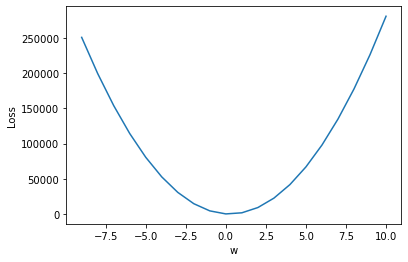

In [20]:
fig, ax = plt.subplots(1, 1)

ax.plot(w_list, losses_w)
ax.set_ylabel("Loss")
ax.set_xlabel("w")

##### Plot loss wrt b
See how the loss changes as b chnages and w remains constant

In [21]:
losses_b = []
b_list = []
for delta in range(-100, 20, 1):
    new_b = b + delta
    b_list.append(new_b)
    t_p = model(t_u, w, new_b)
    loss_b = mean_square_loss(t_p, t_c)
    losses_b.append(loss_b)

Text(0.5, 0, 'b')

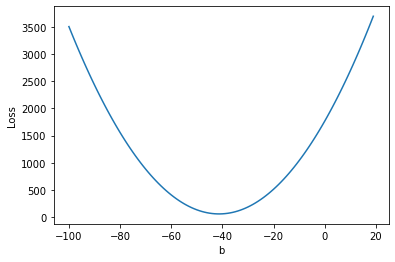

In [22]:
fig, ax = plt.subplots(1, 1)

ax.plot(b_list, losses_b)
ax.set_ylabel("Loss")
ax.set_xlabel("b")

##### Plot loss wrt b and w
See how the loss changes as b and w both change

In [23]:
w_list_tensor = torch.tensor(w_list)
b_list_tensor = torch.tensor(b_list)

In [24]:
ww, bb = torch.meshgrid(w_list_tensor, b_list_tensor)

H:\anaconda\envs\pytorch\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [25]:
ww.shape, bb.shape

(torch.Size([20, 120]), torch.Size([20, 120]))

In [26]:
ll = torch.zeros(ww.shape)

In [27]:
for i, w_ in enumerate(w_list_tensor):
    for j, b_ in enumerate(b_list_tensor):
        t_p = model(t_u, w_, b_)
        loss = mean_square_loss(t_p, t_c)
        ll[i, j] = loss

In [28]:
ll.shape

torch.Size([20, 120])

Text(0.5, 0, 'b')

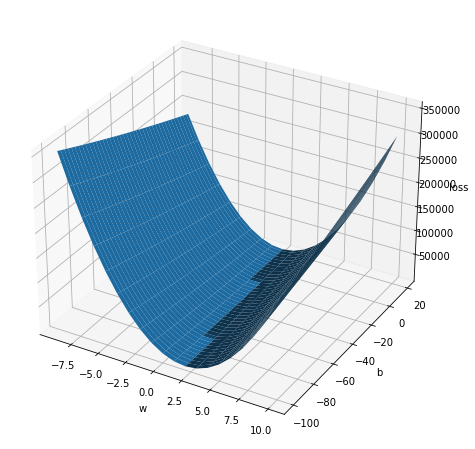

In [29]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
W, B, L = ww.numpy(), bb.numpy(), ll.numpy()

ax.plot_surface(W, B, L)
ax.set_zlabel("loss")
ax.set_xlabel("w")
ax.set_ylabel("b")

### Calculating Gradient

In [30]:
def dloss_fn(t_p, t_c):
    return 2*(t_p - t_c) / t_p.size(0)

In [31]:
def dmodel_dw(t_u, w, b):
    return t_u

In [32]:
def dmodel_db(t_u, w, b):
    return 1.0

In [33]:
def gradient_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [34]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = mean_square_loss(t_p, t_c)
        
        loss_list.append(loss)
        w_list.append(w)
        b_list.append(b)
        
        grad = gradient_fn(t_u, t_c, t_p, w, b)
        grad_w, grad_b = grad
        grad_w_list.append(grad_w)
        grad_b_list.append(grad_b)
        
        params = params - learning_rate * grad
        
        print(f"epoch: {epoch}, loss: {float(loss)}")
    return params

Another way to think of gradient descent algorithm is that we are trying to minimize the gradient (The rate at which the loss changes wrt the parameters) by finding the optimal parameters

In [35]:
loss_list = []
w_list =[]
b_list =[]
grad_w_list = []
grad_b_list = []

n_epochs = 20
training_loop(n_epochs, 1e-4, torch.tensor([1.0, 0.0]), t_u, t_c)

epoch: 1, loss: 1763.884765625
epoch: 2, loss: 323.09051513671875
epoch: 3, loss: 78.92963409423828
epoch: 4, loss: 37.5528450012207
epoch: 5, loss: 30.540283203125
epoch: 6, loss: 29.351154327392578
epoch: 7, loss: 29.148883819580078
epoch: 8, loss: 29.113847732543945
epoch: 9, loss: 29.107145309448242
epoch: 10, loss: 29.105247497558594
epoch: 11, loss: 29.104167938232422
epoch: 12, loss: 29.103221893310547
epoch: 13, loss: 29.102294921875
epoch: 14, loss: 29.10137939453125
epoch: 15, loss: 29.100465774536133
epoch: 16, loss: 29.09954833984375
epoch: 17, loss: 29.098630905151367
epoch: 18, loss: 29.09771728515625
epoch: 19, loss: 29.0967960357666
epoch: 20, loss: 29.09588050842285


tensor([ 0.2323, -0.0196])

#### Plotting Functions

Text(0.5, 1.0, 'Loss vs Epochs')

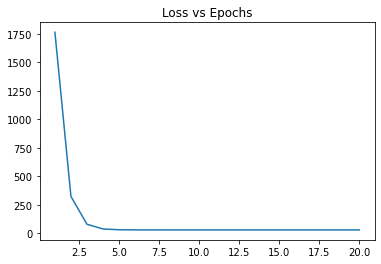

In [36]:
plt.plot(list(range(1, n_epochs+1)), loss_list )
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'w vs Epochs')

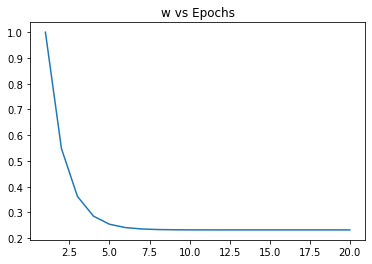

In [37]:
plt.plot(list(range(1, n_epochs+1)), w_list)
plt.title("w vs Epochs")

Text(0.5, 1.0, 'b vs Epochs')

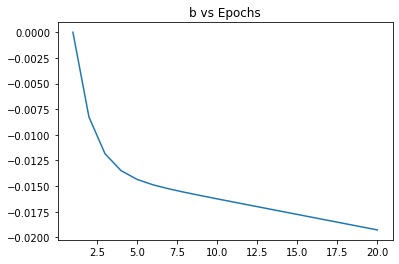

In [38]:
plt.plot(list(range(1, n_epochs+1)), b_list)
plt.title("b vs Epochs")

Text(0, 0.5, 'dL/db')

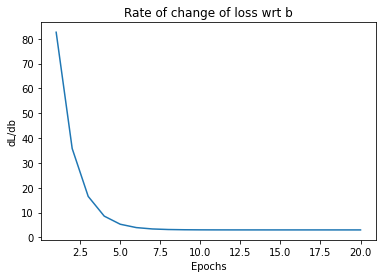

In [39]:
plt.plot(list(range(1, n_epochs+1)), grad_b_list)
plt.title("Rate of change of loss wrt b")
plt.xlabel("Epochs")
plt.ylabel("dL/db")

Text(0, 0.5, 'dL/dw')

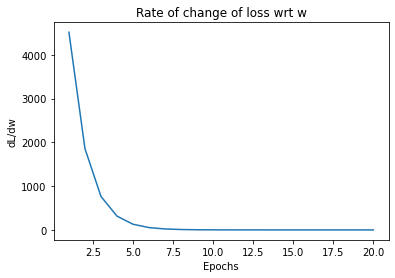

In [40]:
plt.plot(list(range(1, n_epochs+1)), grad_w_list)
plt.title("Rate of change of loss wrt w")
plt.xlabel("Epochs")
plt.ylabel("dL/dw")

We can see from the graph that the rate of change of loss i.e gradient wrt w and b operate on different scales. What it means is that if I take a large learning rate, it might optimize one parameter efficiently, but might blow up the other parameter.

#### Normalizing Inputs

One way to avoid the above problem is to normalize inputs

In [41]:
# in this example, we simply multiply with 0.1 to normalize the inputs
t_un = t_u * 0.1

In [42]:
loss_list = []
w_list =[]
b_list =[]
grad_w_list = []
grad_b_list = []

n_epochs = 20
training_loop(n_epochs, 1e-4, torch.tensor([1.0, 0.0]), t_un, t_c)

epoch: 1, loss: 80.36434173583984
epoch: 2, loss: 79.75247955322266
epoch: 3, loss: 79.14802551269531
epoch: 4, loss: 78.55086517333984
epoch: 5, loss: 77.96089935302734
epoch: 6, loss: 77.3780517578125
epoch: 7, loss: 76.80225372314453
epoch: 8, loss: 76.23340606689453
epoch: 9, loss: 75.67142486572266
epoch: 10, loss: 75.11621856689453
epoch: 11, loss: 74.56773376464844
epoch: 12, loss: 74.0258560180664
epoch: 13, loss: 73.49053192138672
epoch: 14, loss: 72.96166229248047
epoch: 15, loss: 72.43917846679688
epoch: 16, loss: 71.92300415039062
epoch: 17, loss: 71.41305541992188
epoch: 18, loss: 70.90927124023438
epoch: 19, loss: 70.41156768798828
epoch: 20, loss: 69.91986083984375


tensor([1.1467, 0.0198])

Text(0, 0.5, 'dL/db')

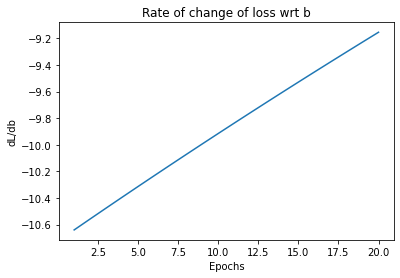

In [43]:
plt.plot(list(range(1, n_epochs+1)), grad_b_list)
plt.title("Rate of change of loss wrt b")
plt.xlabel("Epochs")
plt.ylabel("dL/db")

Text(0, 0.5, 'dL/dw')

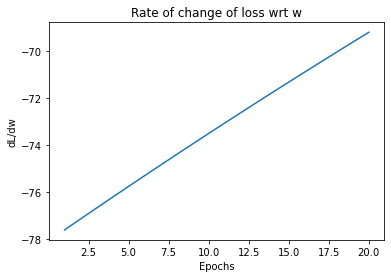

In [44]:
plt.plot(list(range(1, n_epochs+1)), grad_w_list)
plt.title("Rate of change of loss wrt w")
plt.xlabel("Epochs")
plt.ylabel("dL/dw")

We can see that there isn't much difference in scale as how the loss decreases wrt it's parameters as compared previously

In [45]:
loss_list = []
w_list =[]
b_list =[]
grad_w_list = []
grad_b_list = []

n_epochs = 5000
w_optim, b_optim = training_loop(n_epochs, 1e-2, torch.tensor([1.0, 0.0]), t_un, t_c)

epoch: 1, loss: 80.36434173583984
epoch: 2, loss: 37.574913024902344
epoch: 3, loss: 30.871076583862305
epoch: 4, loss: 29.756193161010742
epoch: 5, loss: 29.507152557373047
epoch: 6, loss: 29.3924560546875
epoch: 7, loss: 29.298828125
epoch: 8, loss: 29.208717346191406
epoch: 9, loss: 29.119415283203125
epoch: 10, loss: 29.030488967895508
epoch: 11, loss: 28.941877365112305
epoch: 12, loss: 28.853565216064453
epoch: 13, loss: 28.765552520751953
epoch: 14, loss: 28.6778507232666
epoch: 15, loss: 28.590431213378906
epoch: 16, loss: 28.503318786621094
epoch: 17, loss: 28.4164981842041
epoch: 18, loss: 28.329973220825195
epoch: 19, loss: 28.243741989135742
epoch: 20, loss: 28.157804489135742
epoch: 21, loss: 28.07215118408203
epoch: 22, loss: 27.986797332763672
epoch: 23, loss: 27.9017276763916
epoch: 24, loss: 27.81694984436035
epoch: 25, loss: 27.732463836669922
epoch: 26, loss: 27.648256301879883
epoch: 27, loss: 27.56434440612793
epoch: 28, loss: 27.4807071685791
epoch: 29, loss: 27.3

Text(0.5, 1.0, 'Loss vs Epochs')

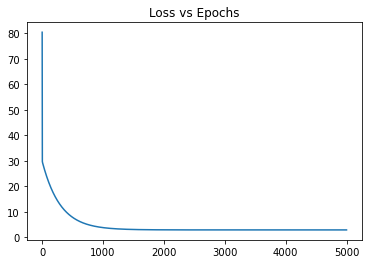

In [46]:
plt.plot(list(range(1, n_epochs+1)), loss_list )
plt.title("Loss vs Epochs")

In [47]:
w_optim, b_optim

(tensor(5.3671), tensor(-17.3012))

Text(0, 0.5, 'dL/db')

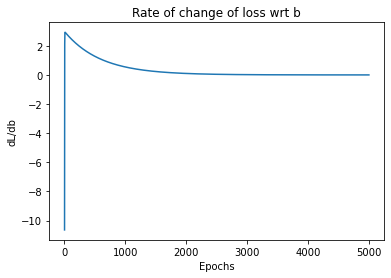

In [48]:
plt.plot(list(range(1, n_epochs+1)), grad_b_list)
plt.title("Rate of change of loss wrt b")
plt.xlabel("Epochs")
plt.ylabel("dL/db")

Text(0, 0.5, 'dL/dw')

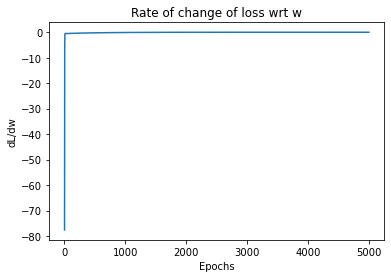

In [49]:
plt.plot(list(range(1, n_epochs+1)), grad_w_list)
plt.title("Rate of change of loss wrt w")
plt.xlabel("Epochs")
plt.ylabel("dL/dw")

As we can see from the above graphs, gradient descent is trying to minimize the gradient or the rate of change of loss.

#### fitting our model

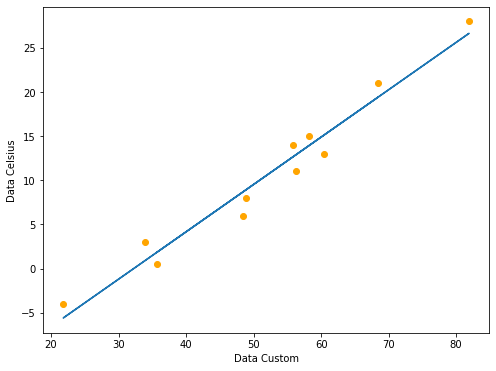

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p = model(t_un, w_optim, b_optim)
ax.plot(t_u.numpy(), t_p.detach().numpy())

In [51]:
t_p

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

## Autograd

In [52]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [53]:
params.grad is None

True

In [54]:
t_p = model(t_u, *params)
loss = mean_square_loss(t_p, t_c)

In [55]:
loss.backward()

In [56]:
params.grad # dL/dw, dL/db

tensor([4517.2969,   82.6000])

Theoretically it means that we're computing rate of change of loss wrt the parameters at that particular value

#### Accumulation of Gradients

In [57]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
for i in range(5):
    t_p = model(t_u, *params)
    loss = mean_square_loss(t_p, t_c)
    loss.backward()
    print(params.grad)

tensor([4517.2969,   82.6000])
tensor([9034.5938,  165.2000])
tensor([13551.8906,   247.8000])
tensor([18069.1875,   330.4000])
tensor([22586.4844,   413.0000])


Observation: Even though the values of params is constant i.e we're not updating the params, you can see that the gradient is changing, and moreover we can see that the gradient is accumulating (summing up over previous values). This is called accumulation of gradients

#### Training with Autograd

In [58]:
def training_loop_autograd(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        
        # since we're updating params, gradient needs to be calculated afresh,
        # hence we are resetting the gradient to avoid accumulation of gradients as seen above
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = mean_square_loss(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, loss: {loss}")
        
    return params

In [59]:
params = training_loop_autograd(5000, 1e-2, torch.tensor([1.0, 0.0], requires_grad=True), t_un, t_c)

Epoch: 500, loss: 7.860115051269531
Epoch: 1000, loss: 3.828537940979004
Epoch: 1500, loss: 3.092191219329834
Epoch: 2000, loss: 2.957697868347168
Epoch: 2500, loss: 2.933133840560913
Epoch: 3000, loss: 2.9286484718322754
Epoch: 3500, loss: 2.9278297424316406
Epoch: 4000, loss: 2.9276793003082275
Epoch: 4500, loss: 2.927651882171631
Epoch: 5000, loss: 2.9276468753814697


In [60]:
params

tensor([  5.3671, -17.3012], requires_grad=True)

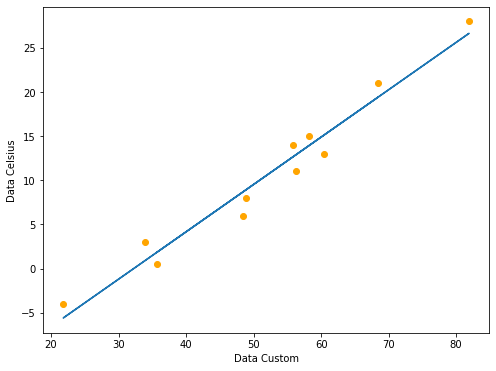

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p = model(t_un, *params)
ax.plot(t_u.numpy(), t_p.detach().numpy())

## Optimizers

In [62]:
import torch.optim as optim

In [63]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [64]:
def training_loop_optimizer(n_epochs, params, optimizer, t_u, t_n):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = mean_square_loss(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, loss: {loss}")
        
    return params

In [65]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [66]:
params = training_loop_optimizer(5000, params, optimizer, t_un, t_c)

Epoch: 500, loss: 7.860115051269531
Epoch: 1000, loss: 3.828537940979004
Epoch: 1500, loss: 3.092191219329834
Epoch: 2000, loss: 2.957697868347168
Epoch: 2500, loss: 2.933133840560913
Epoch: 3000, loss: 2.9286484718322754
Epoch: 3500, loss: 2.9278297424316406
Epoch: 4000, loss: 2.9276793003082275
Epoch: 4500, loss: 2.927651882171631
Epoch: 5000, loss: 2.9276468753814697


In [67]:
params

tensor([  5.3671, -17.3012], requires_grad=True)

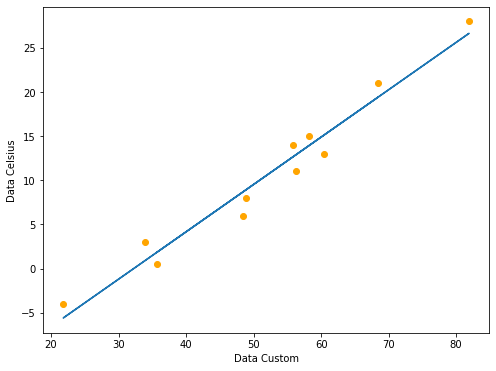

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p = model(t_un, *params) 
ax.plot(t_u.numpy(), t_p.detach().numpy())

#### Using Adam Optimizer

In [69]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

In [70]:
# Even if our inputs are not normalized, Adam takes care of that
params = training_loop_optimizer(5000, params, optimizer, t_u, t_c)

Epoch: 500, loss: 25.590320587158203
Epoch: 1000, loss: 22.958572387695312
Epoch: 1500, loss: 19.641721725463867
Epoch: 2000, loss: 16.026124954223633
Epoch: 2500, loss: 12.481905937194824
Epoch: 3000, loss: 9.332459449768066
Epoch: 3500, loss: 6.805130481719971
Epoch: 4000, loss: 4.99639892578125
Epoch: 4500, loss: 3.8674890995025635
Epoch: 5000, loss: 3.274242401123047


In [71]:
params

tensor([  0.5017, -15.3177], requires_grad=True)

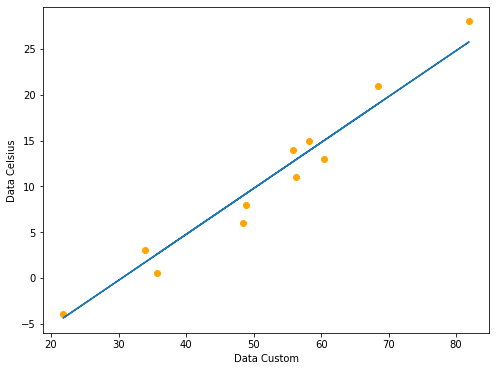

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p = model(t_u, *params)
ax.plot(t_u.numpy(), t_p.detach().numpy())

## Splitting the dataset

In [73]:
n_samples = t_u.shape[0]
split_ratio = 0.2
n_val = int(n_samples * split_ratio)
n_train = n_samples - n_val

In [74]:
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:n_train]
val_indices = shuffled_indices[n_train:]

In [75]:
t_u_train = t_u[train_indices]
t_u_val = t_u[val_indices]

t_c_train = t_c[train_indices]
t_c_val = t_c[val_indices]

In [76]:
t_u_train.shape, t_u_val.shape

(torch.Size([9]), torch.Size([2]))

#### Training again with validation set

In [77]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

In [78]:
def training_loop_with_validation(n_epochs, params, optimizer, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train, *params)
        train_loss = mean_square_loss(t_p_train, t_c_train)
        train_loss_list.append(train_loss.item())
        
        t_p_val = model(t_u_val, *params)
        val_loss = mean_square_loss(t_p_val, t_c_val)
        
        '''
        We can disable autograd when computing validation loss, however, since a new computation graph is formed,
        it'll not interfere with the training even if autograd is enabled, and it makes no difference in our
        case since the dataset is very small
        
        with torch.nograd():
            t_p_val = model(t_u_val, *params)
            val_loss = mean_square_loss(t_p_val, t_c_val)
        '''
        
        val_loss_list.append(val_loss.item())
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"epoch: {epoch}, train loss: {train_loss}, val_loss: {val_loss}")
        
    return params

In [79]:
train_loss_list = []
val_loss_list = []
n_epochs = 6000

In [80]:
params = training_loop_with_validation(n_epochs, params, optimizer, t_u_train, t_u_val, t_c_train, t_c_val)

epoch: 500, train loss: 26.54987335205078, val_loss: 23.762149810791016
epoch: 1000, train loss: 23.323293685913086, val_loss: 22.090045928955078
epoch: 1500, train loss: 19.37331199645996, val_loss: 19.951862335205078
epoch: 2000, train loss: 15.22799301147461, val_loss: 17.560863494873047
epoch: 2500, train loss: 11.349185943603516, val_loss: 15.116226196289062
epoch: 3000, train loss: 8.088815689086914, val_loss: 12.795357704162598
epoch: 3500, train loss: 5.64132022857666, val_loss: 10.737524032592773
epoch: 4000, train loss: 4.027617931365967, val_loss: 9.033493995666504
epoch: 4500, train loss: 3.1199798583984375, val_loss: 7.723729610443115
epoch: 5000, train loss: 2.7034945487976074, val_loss: 6.802726745605469
epoch: 5500, train loss: 2.5570669174194336, val_loss: 6.225597381591797
epoch: 6000, train loss: 2.5207529067993164, val_loss: 5.916370868682861


In [81]:
params

tensor([  0.5274, -16.3869], requires_grad=True)

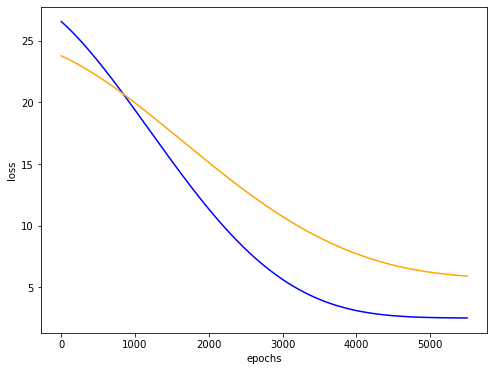

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("epochs")
ax.set_ylabel("loss")

ax.plot(list(range(1, n_epochs+1-500)), train_loss_list[500:], color="blue")
ax.plot(list(range(1, n_epochs+1-500)), val_loss_list[500:], color="orange")

### Exercise: Quadratic model

In [83]:
def quadratic_model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b 

In [84]:
def training_loop_quadratic(n_epochs, params, optimizer, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = quadratic_model(t_u, *params)
        loss = mean_square_loss(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, loss: {loss}")
        
    return params

In [85]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

In [86]:
params = training_loop_quadratic(8000, params, optimizer, t_u, t_c)

Epoch: 500, loss: 6.108692646026611
Epoch: 1000, loss: 5.984355449676514
Epoch: 1500, loss: 5.809031009674072
Epoch: 2000, loss: 5.586315631866455
Epoch: 2500, loss: 5.320901870727539
Epoch: 3000, loss: 5.021266460418701
Epoch: 3500, loss: 4.701308727264404
Epoch: 4000, loss: 4.380753040313721
Epoch: 4500, loss: 4.083409786224365
Epoch: 5000, loss: 3.8326547145843506
Epoch: 5500, loss: 3.644728899002075
Epoch: 6000, loss: 3.522646903991699
Epoch: 6500, loss: 3.4548988342285156
Epoch: 7000, loss: 3.4212453365325928
Epoch: 7500, loss: 3.402289628982544
Epoch: 8000, loss: 3.3858282566070557


In [87]:
params

tensor([ 0.0060, -0.1082, -1.5220], requires_grad=True)

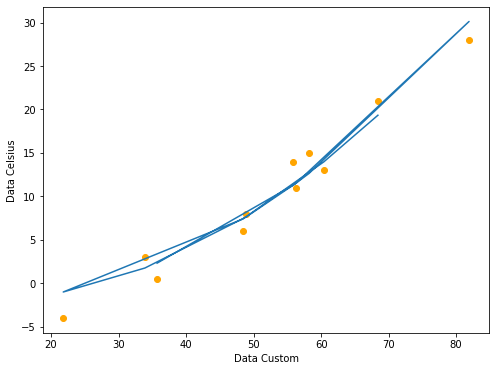

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p = quadratic_model(t_u, *params)
ax.plot(t_u.numpy(), t_p.detach().numpy())

In [89]:
t_u.numpy()

array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4],
      dtype=float32)

In [90]:
t_p.detach().numpy()

array([ 2.3138142, 11.303748 , 12.639893 , 30.129457 , 11.531531 ,
        7.6303873,  1.7518897, -1.0097249,  7.3906517, 13.9777355,
       19.335423 ], dtype=float32)

In [91]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])